# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import json

In [2]:
twitter_archive=pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
twitter_archive.shape

(2356, 17)

In [5]:
response=requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [6]:
content=response.content

In [8]:
with open("image-predictions-tsv", "wb") as file:
    file.write(content)
        

In [9]:
image_predictions=pd.read_csv("image-predictions-tsv", sep="\t")

In [10]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [11]:
image_predictions.shape

(2075, 12)

In [12]:
import tweepy
import configparser

In [13]:
config=configparser.ConfigParser()

In [14]:
config.read("config.ini")

['config.ini']

In [15]:
config

In [16]:
api_key=config["twitter"]["API Key"]
api_key_secret=config["twitter"]["API Key Secret"]
access_token=config["twitter"]["Access Token"]
access_token_secret=config["twitter"]["Access Token Secret"]

In [17]:
auth=tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)

In [18]:
api=tweepy.API(auth)

In [19]:
one=api.get_status(666020888022790149)

In [20]:
one

Status(_api=<tweepy.api.API object at 0x000002870837F4F0>, _json={'created_at': 'Sun Nov 15 22:32:08 +0000 2015', 'id': 666020888022790149, 'id_str': '666020888022790149', 'text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 666020881337073664, 'id_str': '666020881337073664', 'indices': [108, 131], 'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', 'url': 'https://t.co/BLDqew2Ijj', 'display_url': 'pic.twitter.com/BLDqew2Ijj', 'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 960, 'h': 720, 'resize': 'fit'}, 'small': {'w': 680, 'h': 510

In [21]:
id_list=image_predictions.tweet_id.values

In [22]:
id_list

array([666020888022790149, 666029285002620928, 666033412701032449, ...,
       891815181378084864, 892177421306343426, 892420643555336193],
      dtype=int64)

In [23]:
#writing json data to tweet_json.txt file with each tweet json data on its line
with open("tweet_json.txt", "w") as file:
    for twitter in id_list:
        try:
            tweet=api.get_status(twitter)
            json.dump(tweet._json, file)
            file.write("\n")
        except Exception as e:
            pass

In [24]:
#read the file line by line and append to a list
we_rate=[]
with open("tweet_json.txt", 'r') as file:
    for line in file:
        tweet=json.loads(line)
        we_rate.append({"id":tweet["id"],
                        "retweet_count":tweet["retweet_count"],
                        "favorite_count":tweet["favorite_count"]})
        
        

In [25]:
we_rate

[{'id': 666020888022790149, 'retweet_count': 419, 'favorite_count': 2281},
 {'id': 666029285002620928, 'retweet_count': 39, 'favorite_count': 112},
 {'id': 666033412701032449, 'retweet_count': 36, 'favorite_count': 100},
 {'id': 666044226329800704, 'retweet_count': 115, 'favorite_count': 245},
 {'id': 666049248165822465, 'retweet_count': 36, 'favorite_count': 88},
 {'id': 666050758794694657, 'retweet_count': 50, 'favorite_count': 115},
 {'id': 666051853826850816, 'retweet_count': 698, 'favorite_count': 1023},
 {'id': 666055525042405380, 'retweet_count': 196, 'favorite_count': 367},
 {'id': 666057090499244032, 'retweet_count': 111, 'favorite_count': 247},
 {'id': 666058600524156928, 'retweet_count': 47, 'favorite_count': 99},
 {'id': 666063827256086533, 'retweet_count': 180, 'favorite_count': 394},
 {'id': 666071193221509120, 'retweet_count': 50, 'favorite_count': 127},
 {'id': 666073100786774016, 'retweet_count': 129, 'favorite_count': 273},
 {'id': 666082916733198337, 'retweet_count':

In [26]:
#convert list to dataframe
we_rate_dogs=pd.DataFrame(we_rate,columns=["id","retweet_count","favorite_count"] )

In [27]:
we_rate_dogs

,id,retweet_count,favorite_count
0,666020888022790149,419,2281
1,666029285002620928,39,112
2,666033412701032449,36,100
3,666044226329800704,115,245
4,666049248165822465,36,88
...,...,...,...
2052,891327558926688256,7715,35178
2053,891689557279858688,7183,36737
2054,891815181378084864,3464,21971
2055,892177421306343426,5272,29207


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [258]:
#copy the original dataset
archive=twitter_archive.copy()
predictions=image_predictions.copy()
rate=we_rate_dogs.copy()

In [259]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
939,753039830821511168,NaN,NaN,2016-07-13 01:34:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",So this just changed my life. 13/10 please enj...,NaN,NaN,NaN,https://vine.co/v/5W2Dg3XPX7a,13,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
689,787717603741622272,NaN,NaN,2016-10-16 18:11:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tonks. She is a service puppo. Can hea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787717603...,13,10,Tonks,None,None,None,puppo
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669923323...,10,10,a,None,None,None,None
1563,688179443353796608,NaN,NaN,2016-01-16 02:02:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lizzie. She's about to fist bump the l...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688179443...,10,10,Lizzie,None,None,pupper,None


In [260]:
archive.in_reply_to_status_id.nunique()

77

In [261]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [262]:
archive.retweeted_status_id.unique()

array([           nan, 8.87473957e+17, 8.86053734e+17, 8.30583321e+17,
       8.78057613e+17, 8.78281511e+17, 6.69000397e+17, 8.76850772e+17,
       8.66334965e+17, 8.68880398e+17, 8.73213776e+17, 8.72657584e+17,
       8.41077006e+17, 8.59196979e+17, 8.68552279e+17, 8.65013420e+17,
       8.66450706e+17, 8.37820168e+17, 8.63062472e+17, 8.06629075e+17,
       8.60563773e+17, 8.60914485e+17, 7.61672994e+17, 8.39549326e+17,
       8.57061112e+17, 8.44704788e+17, 8.56330159e+17, 8.42163533e+17,
       8.55122533e+17, 8.31650052e+17, 8.29374342e+17, 8.48289382e+17,
       8.33124695e+17, 8.32369877e+17, 8.47971000e+17, 7.56288534e+17,
       7.73308824e+17, 8.07106841e+17, 8.17423860e+17, 8.40632337e+17,
       6.67152164e+17, 8.39289919e+17, 8.38905981e+17, 7.83839966e+17,
       8.20749717e+17, 8.37011345e+17, 8.36648149e+17, 8.17827839e+17,
       7.86963064e+17, 8.35264099e+17, 7.53039831e+17, 8.29501995e+17,
       8.32434358e+17, 8.32766382e+17, 7.86709083e+17, 7.93286476e+17,
      

In [263]:
archive.retweeted_status_id.isna().count()

2356

In [264]:
archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [265]:
predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1924,857263160327368704,https://pbs.twimg.com/media/C-WcS4MXoAADrBU.jpg,1,Samoyed,0.998021,True,Pomeranian,0.000922,True,keeshond,0.000311,True
1087,718939241951195136,https://pbs.twimg.com/media/CfovbK4WIAAkTn3.jpg,1,Pembroke,0.766327,True,Cardigan,0.222126,True,toilet_tissue,0.006757,False
1868,844223788422217728,https://pbs.twimg.com/media/C7dJCnqU4AAswat.jpg,1,Labrador_retriever,0.719510,True,Chesapeake_Bay_retriever,0.122019,True,Newfoundland,0.038828,True
1355,760290219849637889,https://pbs.twimg.com/ext_tw_video_thumb/76028...,1,Old_English_sheepdog,0.302200,True,Lhasa,0.258803,True,briard,0.179200,True
1761,826115272272650244,https://pbs.twimg.com/media/C3bzVILWcAUjS5i.jpg,1,tennis_ball,0.997071,False,golden_retriever,0.002331,True,kuvasz,0.000283,True


In [266]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [267]:
rate.sample(5)

,id,retweet_count,favorite_count
1898,853760880890318849,5102,25992
1267,749417653287129088,1505,5655
454,674764817387900928,200,699
2020,884562892145688576,3895,21234
946,704761120771465216,2617,6119


In [268]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2057 non-null   int64
 1   retweet_count   2057 non-null   int64
 2   favorite_count  2057 non-null   int64
dtypes: int64(3)
memory usage: 48.3 KB


### Quality issues
1. wrong datatypes for timestamp in archived table 

2. Change datatype of  tweet_id to string

3. wrong datatypes for p1, p2 and p3 in predictions should be category

4. for consistency in archive we are only going to take the data with the rating_denominator of 10 in archive table

5. There is no consistency in prediction table since in p1, p2 and p3 some names start with uppercase

6. The dog_stage column in archive should be category

7. change the id column in rate table to tweet_id

8. missing values in retweeted_status_id and retweeted_status_user_id in archive table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [269]:
# Make copies of original pieces of data


### Issue #1:wrong datatypes for timestamp in archive table

#### Define:Change the datatype of twitter_archived_enhanced table to timestamp

#### Code

In [270]:
archive.timestamp.dtype

dtype('O')

In [271]:
#convert the datatype of timestamp to datetime
archive['timestamp']=pd.to_datetime(archive['timestamp'])

#### Test

In [272]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2:for consistency in archive we are only going to take the data with the rating_denominator of 10 in archive table

#### Define will remove all the rows that do not have denominator as 10

#### Code

In [273]:
archive.rating_denominator.sample(10)

365     10
1007    10
1252    10
313      0
1557    10
2200    10
1687    10
2120    10
1757    10
1400    10
Name: rating_denominator, dtype: int64

In [274]:
#taking only the rows with the denominator value is 10
archive=archive.query('rating_denominator==10')

In [275]:
archive.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
122,869227993411051520,NaN,NaN,2017-05-29 16:24:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gizmo. His favorite thing is standing ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869227993...,13,10,Gizmo,None,None,None,None
1824,676496375194980353,NaN,NaN,2015-12-14 20:17:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Griffin. He's upset because his c...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676496375...,9,10,Griffin,None,None,None,None
148,863427515083354112,8.634256e+17,77596200.0,2017-05-13 16:15:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
894,759197388317847553,NaN,NaN,2016-07-30 01:22:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. She's just heckin precious af I ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759197388...,12,10,Luna,None,None,None,None
1717,680191257256136705,NaN,NaN,2015-12-25 01:00:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy Christmas pupper 11/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680191257...,11,10,None,None,None,pupper,None
1348,704347321748819968,NaN,NaN,2016-02-29 16:47:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphson. He's very confused. Wonderin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704347321...,10,10,Ralphson,None,None,pupper,None


In [276]:
archive.shape

(2333, 17)

#### Test

In [277]:
archive.query('rating_denominator!=10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3:Change datatype of  tweet_id to string

In [278]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2333 non-null   int64              
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2333 non-null   datetime64[ns, UTC]
 4   source                      2333 non-null   object             
 5   text                        2333 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2278 non-null   object             
 10  rating_numerator            2333 non-null   int64           

In [279]:
#changing the datatype of tweet_id column to sring
archive["tweet_id"]=archive["tweet_id"].astype(str)
predictions["tweet_id"]=predictions["tweet_id"].astype(str)
rate["id"]=rate["id"].astype(str)

#Test

In [280]:

archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2333 non-null   object             
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2333 non-null   datetime64[ns, UTC]
 4   source                      2333 non-null   object             
 5   text                        2333 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2278 non-null   object             
 10  rating_numerator            2333 non-null   int64           

In [281]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [282]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2057 non-null   object
 1   retweet_count   2057 non-null   int64 
 2   favorite_count  2057 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 48.3+ KB


### Issue #4: ru le of every observation should be in each row has been broken for floofer, doggo, pupper and puppo dog types columns in archive table

In [283]:
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [284]:
#Create a column called dog_stage and extract stage names from text
archive['dog_stage']=archive['text'].str.extract("(doggo|floofer|pupper|puppo)")

In [285]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
51,882268110199369728,NaN,NaN,2017-07-04 16:01:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfy. You're witnessing his first wate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882268110...,13,10,Alfy,None,None,None,None,NaN
918,756651752796094464,NaN,NaN,2016-07-23 00:46:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gert. He just wants you to be happy. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756651752...,11,10,Gert,None,None,None,None,NaN
1380,701214700881756160,NaN,NaN,2016-02-21 01:19:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...","I'm not sure what's happening here, but it's p...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/701214700...,12,10,None,None,None,None,None,NaN
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None,NaN
793,773547596996571136,NaN,NaN,2016-09-07 15:44:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chelsea. She forgot how to dog. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773547596...,11,10,Chelsea,None,None,pupper,None,pupper


In [286]:
#drop the extra 'doggo', 'floofer', 'pupper', 'puppo' columns
archive=archive.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'])

In [287]:
archive.shape

(2333, 14)

#test

In [288]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1083,738537504001953792,NaN,NaN,2016-06-03 01:07:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738537504...,11,10,Bayley,puppo
1902,674644256330530816,NaN,NaN,2015-12-09 17:38:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you see sophomores in high school driving...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674644256...,11,10,None,NaN
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
1924,674075285688614912,NaN,NaN,2015-12-08 03:57:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mitch. He thinks that's a hat. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674075285...,11,10,Mitch,NaN
1323,706265994973601792,NaN,NaN,2016-03-05 23:51:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kara. She's been trying to solve that ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706265994...,11,10,Kara,NaN


In [289]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2333 non-null   object             
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2333 non-null   datetime64[ns, UTC]
 4   source                      2333 non-null   object             
 5   text                        2333 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2278 non-null   object             
 10  rating_numerator            2333 non-null   int64           

### Issue #5:There is no consistency in prediction table since in p1, p2 and p3 some names start with uppercase

In [290]:
predictions.p1.sample(5)

841             bow_tie
1597    Norfolk_terrier
249        Ibizan_hound
1411               chow
153              beagle
Name: p1, dtype: object

In [291]:
#convert all the names to lowercase
predictions.p1=predictions.p1.str.lower()
predictions.p2=predictions.p2.str.lower()
predictions.p3=predictions.p3.str.lower()

# test

In [292]:
predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1338,758467244762497024,https://pbs.twimg.com/ext_tw_video_thumb/75846...,1,labrador_retriever,0.436377,True,chihuahua,0.113956,True,american_staffordshire_terrier,0.099689,True
267,670807719151067136,https://pbs.twimg.com/media/CU8v-rdXIAId12Z.jpg,1,old_english_sheepdog,0.958035,True,sealyham_terrier,0.013892,True,border_collie,0.004601,True
69,667188689915760640,https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg,1,vacuum,0.335830,False,swab,0.265278,False,toilet_tissue,0.140703,False
436,674410619106390016,https://pbs.twimg.com/media/CVv84VDUEAEm3dW.jpg,1,brown_bear,0.698207,False,sea_lion,0.046475,False,beagle,0.019427,True
1665,812503143955202048,https://pbs.twimg.com/media/C0aXTLqXEAADxBi.jpg,2,loupe,0.546856,False,web_site,0.345298,False,bubble,0.010528,False


### Issue #6:wrong datatypes for p1, p2 and p3 in predictions should be category

In [293]:
predictions.p1.dtype

dtype('O')

In [294]:
predictions.p2.dtype

dtype('O')

In [295]:
predictions.p3.dtype

dtype('O')

In [296]:
#Change the datatype of p1 p2 and p3 in predictions to category
predictions.p1=predictions.p1.astype('category')
predictions.p2=predictions.p2.astype('category')
predictions.p3=predictions.p3.astype('category')

#test

In [297]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   tweet_id  2075 non-null   object  
 1   jpg_url   2075 non-null   object  
 2   img_num   2075 non-null   int64   
 3   p1        2075 non-null   category
 4   p1_conf   2075 non-null   float64 
 5   p1_dog    2075 non-null   bool    
 6   p2        2075 non-null   category
 7   p2_conf   2075 non-null   float64 
 8   p2_dog    2075 non-null   bool    
 9   p3        2075 non-null   category
 10  p3_conf   2075 non-null   float64 
 11  p3_dog    2075 non-null   bool    
dtypes: bool(3), category(3), float64(3), int64(1), object(2)
memory usage: 165.4+ KB


### Issue #7:The dog_stage column in archive should be category

In [298]:
archive.dog_stage.dtype

dtype('O')

In [299]:
#change the datatype of dog_stage column to category
archive.dog_stage=archive.dog_stage.astype("category")

#test

In [300]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2333 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2333 non-null   object             
 1   in_reply_to_status_id       73 non-null     float64            
 2   in_reply_to_user_id         73 non-null     float64            
 3   timestamp                   2333 non-null   datetime64[ns, UTC]
 4   source                      2333 non-null   object             
 5   text                        2333 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2278 non-null   object             
 10  rating_numerator            2333 non-null   int64           

### Issue #8: change the id column in rate table to tweet_id

In [301]:
rate.head()

,id,retweet_count,favorite_count
0,666020888022790149,419,2281
1,666029285002620928,39,112
2,666033412701032449,36,100
3,666044226329800704,115,245
4,666049248165822465,36,88


In [302]:
#change the id column to tweet_id
rate.rename(columns={'id':'tweet_id'}, inplace=True)

#test

In [303]:
rate.head(2)

,tweet_id,retweet_count,favorite_count
0,666020888022790149,419,2281
1,666029285002620928,39,112


### Issue #9: missing values in retweeted_status_id and retweeted_status_user_id in archive table

In [304]:
archive.retweeted_status_id.value_counts()

8.874740e+17    1
6.718968e+17    1
6.675094e+17    1
6.671828e+17    1
6.661041e+17    1
               ..
8.250266e+17    1
7.950767e+17    1
7.840579e+17    1
8.222448e+17    1
6.675484e+17    1
Name: retweeted_status_id, Length: 180, dtype: int64

In [305]:
#remove  the data with retweets 
archive=archive[archive.retweeted_status_id.isna()]

#test

In [ ]:
archive[~archive.retweeted_status_id.isna()]

In [307]:
archive.shape

(2153, 14)

### Issue #10:Merge the dataset into one master dataset

In [308]:
#merge the tree dataests
master_dataset=predictions.merge(archive, on='tweet_id', how='left')
master_dataset=master_dataset.merge(rate, on='tweet_id', how='left')

#test

In [309]:
master_dataset.shape

(2075, 27)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [310]:
#storing the master dataset twitter_archive_master.csv
master_dataset.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [311]:
df=pd.read_csv("twitter_archive_master.csv")

In [312]:
df.query('dog_stage=="floofer"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
1450,776218204058357768,https://pbs.twimg.com/media/CsWuVEdWcAAqbe9.jpg,1,samoyed,0.940326,True,pomeranian,0.055527,True,keeshond,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13.0,10.0,None,floofer,14634.0,27977.0
1604,800388270626521089,https://pbs.twimg.com/media/CxuM3oZW8AEhO5z.jpg,2,golden_retriever,0.359860,True,pembroke,0.194207,True,collie,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800388270...,12.0,10.0,Doc,floofer,2626.0,10571.0
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,tibetan_mastiff,0.007099,True,newfoundland,...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13.0,10.0,Grizzwald,floofer,3061.0,19869.0


In [313]:
df.groupby('dog_stage').retweet_count.mean()

dog_stage
doggo      5007.242857
floofer    6773.666667
pupper     1879.576037
puppo      5557.851852
Name: retweet_count, dtype: float64

In [314]:
df.groupby('dog_stage').favorite_count.mean()

dog_stage
doggo      15398.057143
floofer    19472.333333
pupper      6158.963134
puppo      20315.666667
Name: favorite_count, dtype: float64

In [315]:
df.groupby('dog_stage').rating_numerator.mean()

dog_stage
doggo      11.633803
floofer    12.666667
pupper     10.631336
puppo      12.142857
Name: rating_numerator, dtype: float64

### Insights:
1. dog stage doggo has the highest retweet count with a mean of 10928.14 retweets

2. dog_stage doggo has the highest favorite_count

3. floofer has the highest numerator rating

### Visualization

In [316]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'mean rating_numerstor')

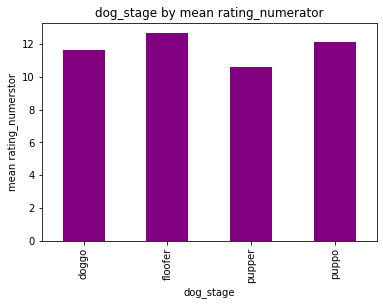

In [317]:
df.groupby('dog_stage').rating_numerator.mean().plot(kind="bar", color='purple')
plt.title("dog_stage by mean rating_numerator")
plt.xlabel("dog_stage")
plt.ylabel("mean rating_numerstor")

Text(0.5, 1.0, 'dog stage versus mean favorite_count')

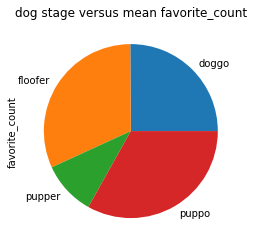

In [318]:
df.groupby('dog_stage').favorite_count.mean().plot(kind='pie')
plt.title("dog stage versus mean favorite_count")